In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from tabulate import tabulate
from sklearn.metrics import accuracy_score
import itertools

In [2]:
train=pd.read_csv('Train_data.csv')

In [3]:
test=pd.read_csv('Test_data.csv')

In [4]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [8]:
train.shape

(25192, 42)

In [9]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
# total = train.shape[0]
# missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
# for col in missing_columns:
#     null_count = train[col].isnull().sum()
#     per = (null_count/total) * 100
#     print(f"{col}: {null_count} ({round(per, 3)}%)")

In [11]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

# train=train.drop_duplicates()   if duplicates present

Number of duplicate rows: 0


<Axes: xlabel='class', ylabel='count'>

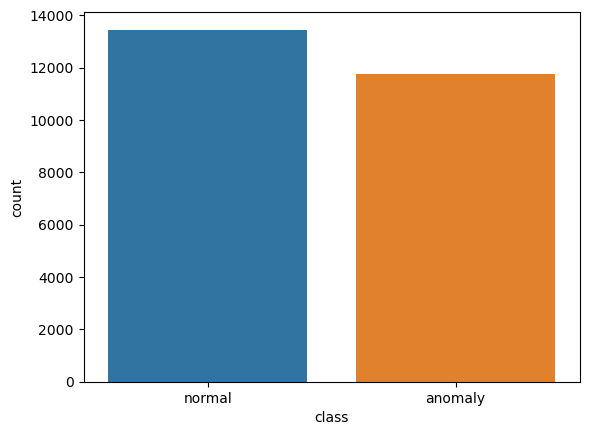

In [12]:
sns.countplot(x=train['class'])

In [13]:
print('Class distribution Training set:')
print(train['class'].value_counts())

Class distribution Training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [14]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
def le(df):
    #for col in ['protocol_type','service','flag']:
    df['protocol_type'] = label_encoder1.fit_transform(df['protocol_type'])
    df['service'] = label_encoder2.fit_transform(df['service'])
    df['flag'] = label_encoder3.fit_transform(df['flag'])
label=LabelEncoder()
train['class']=label.fit_transform(train['class'])

le(train)
#le(test)

In [15]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [16]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [17]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [18]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [19]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [20]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [21]:
X_train = X_train[selected_features]

In [22]:
X_train

,protocol_type,service,flag,src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate
0,1,19,9,491,0,2,1.00,0.00,25,0.17
1,2,41,9,146,0,13,0.08,0.15,1,0.00
2,1,46,5,0,0,123,0.05,0.07,26,0.10
3,1,22,9,232,8153,5,1.00,0.00,255,1.00
4,1,22,9,199,420,30,1.00,0.00,255,1.00
...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,0,0,100,0.07,0.07,7,0.03
25188,1,19,9,334,0,1,1.00,0.00,39,1.00
25189,1,46,1,0,0,105,0.07,0.07,13,0.05
25190,1,38,5,0,0,129,0.14,0.06,20,0.08


In [23]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
#test = scale.fit_transform(test)

In [24]:
X_train

array([[-0.12606067, -0.64538418,  0.75302096, ..., -0.34928194,
        -0.81398452, -0.7791569 ],
       [ 2.21591606,  0.76892549,  0.75302096, ...,  0.49083556,
        -1.03089514, -1.15783086],
       [-0.12606067,  1.09035951, -0.73992391, ...,  0.04277289,
        -0.80494658, -0.93508147],
       ...,
       [-0.12606067,  1.09035951, -2.23286879, ...,  0.04277289,
        -0.92243983, -1.04645617],
       [-0.12606067,  0.57606508, -0.73992391, ..., -0.01323494,
        -0.85917423, -0.97963135],
       [-0.12606067, -0.77395779, -0.73992391, ...,  0.26680423,
        -0.59707391, -0.73460702]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.80, random_state=2)

In [26]:
x_train.shape

(20153, 10)

In [27]:
x_test.shape

(5039, 10)

In [28]:
y_train.shape

(20153,)

In [29]:
y_train

21134    1
4035     0
16267    0
18380    1
7484     1
        ..
18898    1
11798    1
6637     1
2575     0
23720    0
Name: class, Length: 20153, dtype: int32

In [30]:
y_test.shape

(5039,)

In [31]:
import time

In [32]:
from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


Training time:  0.10131430625915527


In [33]:
start_time = time.time()
y_test_pred = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.0038902759552001953


In [34]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [35]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9294397856398551
Test Score: 0.9196269101012106


In [36]:
pred2=lg_model.predict(x_test)
accuracy_score(y_test,pred2)

0.9196269101012106

In [37]:
knn = KNeighborsClassifier()
start_time = time.time()
knn.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.08513069152832031


In [38]:
start_time = time.time()
y_test_pred = knn.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  2.7522964477539062


In [39]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)


knn_train, knn_test = knn.score(x_train , y_train), knn.score(x_test , y_test)

print(f"Training Score: {knn_train}")
print(f"Test Score: {knn_test}")

Training Score: 0.9877933806381184
Test Score: 0.9833300257987696


In [40]:
pred1=knn.predict(x_test)
accuracy_score(y_test,pred1)

0.9833300257987696

In [41]:
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.04691934585571289


In [42]:
start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.002958536148071289


In [43]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 0.9950386981543957


In [44]:
pred=dt.predict(x_test)

In [45]:
accuracy_score(y_test,pred)

0.9950386981543957

In [46]:
data = [["KNN", knn_train, knn_test],
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.987793 │     0.98333  │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.92944  │     0.919627 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.995039 │
╘═════════════════════╧═══════════════╧══════════════╛


In [47]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL

lr = LogisticRegression()

In [48]:
from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [49]:
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

In [50]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

*************** KNeighborsClassifier Model Validation ***************
Mean precision: 
 98.53 % +- 0.2

Mean recall: 
 98.24 % +- 0.32

**************** LogisticRegression Model Validation ****************
Mean precision: 
 91.39 % +- 0.6

Mean recall: 
 95.78 % +- 0.64

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 99.53 % +- 0.14

Mean recall: 
 99.6 % +- 0.17



<Axes: >

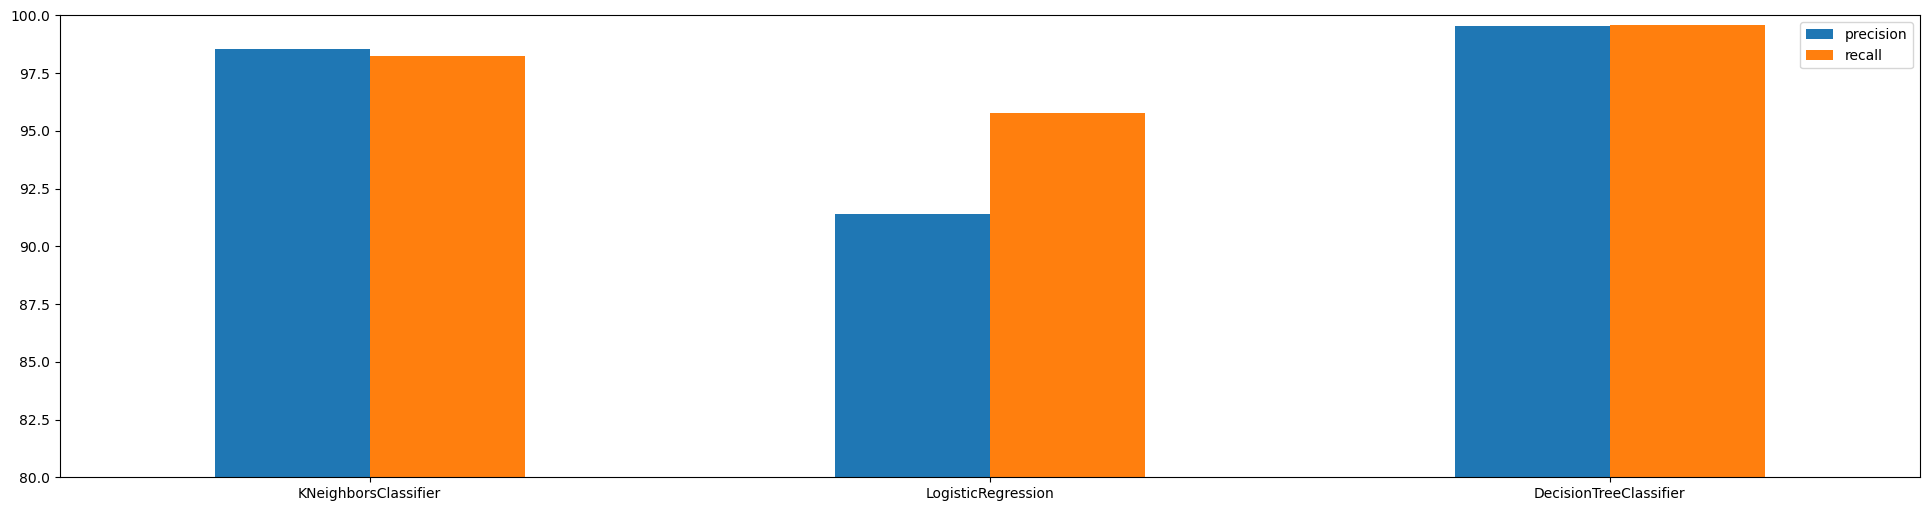

In [51]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [52]:
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [53]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


In [54]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

*************** KNeighborsClassifier Model Testing ***************
[[2291   42]
 [  42 2664]]
---------------
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98      2333
     anamoly       0.98      0.98      0.98      2706

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039

**************** LogisticRegression Model Testing ****************
[[2070  263]
 [ 142 2564]]
----------------
              precision    recall  f1-score   support

      normal       0.94      0.89      0.91      2333
     anamoly       0.91      0.95      0.93      2706

    accuracy                           0.92      5039
   macro avg       0.92      0.92      0.92      5039
weighted avg       0.92      0.92      0.92      5039

************** DecisionTreeClassifier Model Testing **************
[[2325    8]
 [  18 2688]]
--------------
              pr

<Axes: >

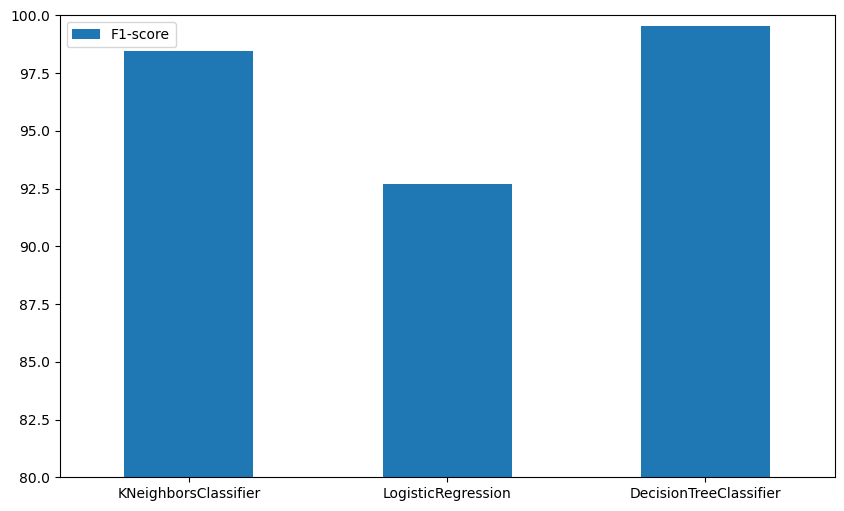

In [55]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

In [81]:
input_data=pd.DataFrame({"protocol_type":["tcp"],"service":["ftp_data"],"flag":["SF"],"src_bytes":[491],"dst_bytes":[0],"count":[2],"same_srv_rate":[1],"diff_srv_rate":[0],"dst_host_srv_count":[25],"dst_host_same_srv_rate":[0.17]})
#c = ['protocol_type','service','flag']
input_data['protocol_type'] = label_encoder1.transform(input_data['protocol_type'])
input_data['service'] = label_encoder2.transform(input_data['service'])
input_data['flag'] = label_encoder3.transform(input_data['flag'])
input_data

,protocol_type,service,flag,src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate
0,1,19,9,491,0,2,1,0,25,0.17


In [82]:
print(input_data)

   protocol_type  service  flag  src_bytes  dst_bytes  count  same_srv_rate  \
0              1       19     9        491          0      2              1   

   diff_srv_rate  dst_host_srv_count  dst_host_same_srv_rate  
0              0                  25                    0.17  


In [83]:
#input_data=np.asarray(input_data)

In [84]:
#input_data=scale.transform(input_data)
loaded_model_exp=pickle.load(open("stand_final123.pkl","rb"))

In [85]:
input_data=loaded_model_exp.transform(input_data)

In [86]:
input_data

array([[-0.12606067, -0.64538418,  0.75302096, -0.00988885, -0.03930979,
        -0.7202436 ,  0.77210866, -0.34928194, -0.81398452, -0.7791569 ]])

In [66]:
ss=dt.predict(input_data)

In [67]:
print(ss)

[1]


In [68]:
import pickle

In [69]:
file_name="project_model_final.sav"
pickle.dump(dt,open(file_name,'wb'))

In [70]:
loaded_model1=pickle.load(open("project_model_final.sav","rb"))

In [71]:
print(loaded_model1.predict(input_data))

[1]


In [72]:
file_name="label_final_1.pkl"
pickle.dump(label_encoder1,open(file_name,'wb'))

In [73]:
file_name="label_final_2.pkl"
pickle.dump(label_encoder2,open(file_name,'wb'))

In [74]:
file_name="label_final_3.pkl"
pickle.dump(label_encoder3,open(file_name,'wb'))

In [75]:
file_name="stand_final123.pkl"
pickle.dump(scale,open(file_name,'wb'))

In [88]:
import sklearn

In [89]:
print(sklearn.__version__)

1.3.0
